<a href="https://colab.research.google.com/github/MariaSanSal/PIA05/blob/main/PIA05_Guia_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de clasificación de imágenes basado en una red neuronal profunda

Se pide utilizar el dataset que viene precargado en la librería Keras: [CIFAR10](https://keras.io/api/datasets/cifar10/)


1. Importa los módulos necesarios de la librería Keras. Sugerencia:


```
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
```



In [15]:
#	Importa la librerías
# Importa los módulos necesarios para construir una red neuronal profunda: Sequential, Dense y Flatten
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense



2. Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test. Sugerencia:


```
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```



In [5]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


3. Explora los datos, especialmente, las dimensiones del dataset. Aplica normalización a los datos de entrada y la técnica one-hot encoding a los de salida.

*Sugerencia para normalizar:*


```
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
```
*Sugerencia de aplicación one-hot encoding para categorizar etiquetas:*


```
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
```




In [6]:
# Exploración de los datos
X_train.shape

(50000, 32, 32, 3)

In [7]:
len(y_train)

50000

In [8]:
y_train


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [25]:
 model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,490 (517.54 KB)

 Trainable params: 132,490 (517.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [19]:
from tensorflow.keras.utils import to_categorical
to_categorical?
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

4. Crea un modelo basado en redes neuronales profundas que tenga más de una capa de tipo Dense (Keras). Si es necesario, usa la capa Flatten al principio. Prueba un primer modelo lo más sencillo posible.

In [34]:
import keras


model = keras.Sequential([
    # capa para que tengamos una dimensión "aplanar". En nuestro caso necesario al tener varias dimensiones
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation = 'relu'), # capa con  neuronas y activación relu
    keras.layers.Dense(10, activation = 'softmax') # capa con  neuronas y activación softmax que se suele utilizar en problema de clasificación múltiple
])


5. Configura el entrenamiento utilizando la función compile, con la función loss = 'categorical_crossentropy' y el optimizador Adam. Utiliza la función fit para entrenar el modelo, inicialmente, con 20 epochs.

In [39]:
#usaremos Adam como indica, que además indican que presenta un mejor comportamiento general y
#es la que recomiendan en los primeros entrenamiento
#compile?
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')
model.fit(X_train, y_train, epochs = 20)




Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2821 - loss: 2.0032
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3739 - loss: 1.7523
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4006 - loss: 1.6774
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4092 - loss: 1.6547
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4186 - loss: 1.6276
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4237 - loss: 1.6078
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4317 - loss: 1.5999
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4351 - loss: 1.5866
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4389 - loss: 1.5687
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4428 - loss: 1.5592
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4446 - loss: 1.5527
Epoch 12/20
1563/1563 

6. Crea un nuevo modelo con más capas y mayor número de neuronas. Entrénalo utilizando un número mayor de epochs y analiza el resultado. ¿Has conseguido mejorar la precisión? haz varias pruebas y quédate con el modelo que mejores resultados da.

In [60]:
import keras

model = keras.Sequential([
    # capa para que tengamos una dimensión "aplanar". En nuestro caso necesario al tener varias dimensiones
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation = 'sigmoid') # capa con  neuronas y activación softmax que se suele utilizar en problema de clasificación múltiple
])



model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')

model.fit(X_train, y_train, batch_size=256, epochs = 20)




Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 2.0690 - val_loss: 1.8057
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 1.7814 - val_loss: 1.7134
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 1.6768 - val_loss: 1.6191
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 1.6183 - val_loss: 1.5957
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 1.5686 - val_loss: 1.6074
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 1.5298 - val_loss: 1.5745
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 1.5058 - val_loss: 1.4893
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 1.4567 - val_loss: 1.5267
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 1.4415 - val_loss: 1.4758
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 1.4246 - val_loss: 1.4712
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 1.4066 - val_loss: 1.4836
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━

7. Utiliza el método evaluate para ver la precisión que se alcanzaría con datos nuevos, aplicándolo al conjunto de datos de test. ¿Es muy diferente a la precisión alcanzada en el entrenamiento?

In [ ]:
# Escribe aquí tu código


8. Explora de forma visual la precisión que se consigue, representando las primeras 25 imágenes del conjunto de datos de test, y comparando la etiqueta real con la de la predicción. Aquí tienes una posible forma de hacerlo (recuerda poner el nombre de tu modelo a la hora de aplicar el método predict):


```
predictions = model.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)
```



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


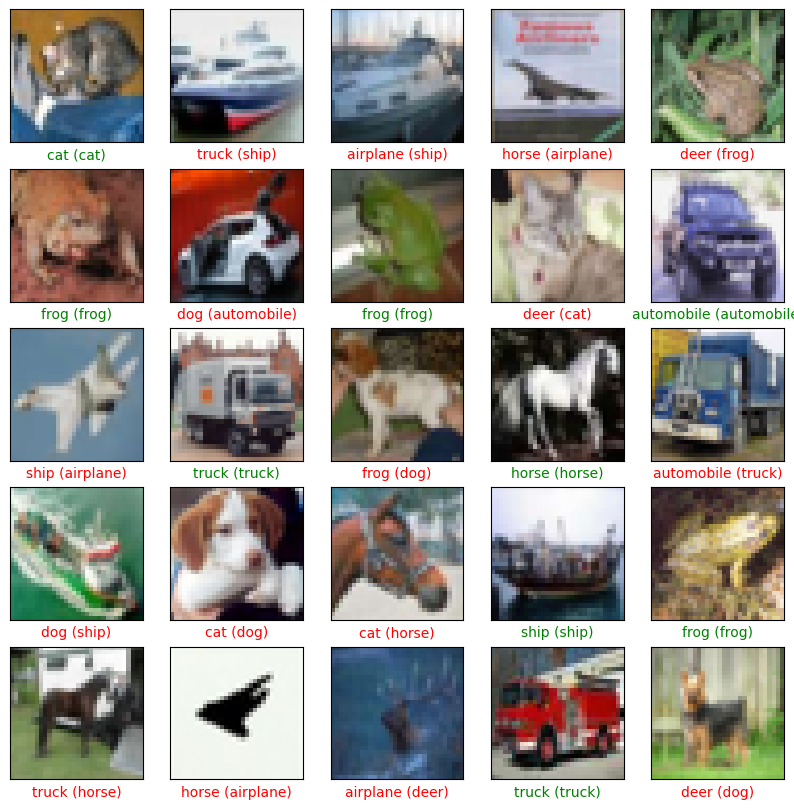

In [61]:
predictions = model.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)